In [16]:
from sklearn.datasets import fetch_california_housing

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
 
from matplotlib import pyplot as plt
 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree

In [2]:
california_housing = fetch_california_housing(as_frame=True)
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
housing = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)

housing.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
housing_target = pd.DataFrame(california_housing.target)
housing_target.head(5)

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [7]:
housing.info()#Пропусков нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [8]:
X = housing
y = housing_target

In [9]:
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )  
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Score = ', model.score(X_test, y_test))

Score =  0.575787706032451


In [10]:
dtr = tree.DecisionTreeRegressor(min_samples_leaf=3, criterion='friedman_mse', random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )  
model = dtr.fit(X_train, y_train)
print('Score = ', dtr.score(X_test, y_test))

Score =  0.669692328562036


In [11]:
dtr = tree.DecisionTreeRegressor(min_samples_leaf=3, criterion='squared_error', random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )  
model = dtr.fit(X_train, y_train)
print('Score = ', dtr.score(X_test, y_test))

Score =  0.6701039607143126


In [12]:
text_representation = tree.export_text(dtr)
print(text_representation)

|--- feature_0 <= 5.09
|   |--- feature_0 <= 3.07
|   |   |--- feature_2 <= 4.31
|   |   |   |--- feature_0 <= 2.21
|   |   |   |   |--- feature_2 <= 3.42
|   |   |   |   |   |--- feature_3 <= 1.03
|   |   |   |   |   |   |--- feature_7 <= -121.83
|   |   |   |   |   |   |   |--- feature_3 <= 0.89
|   |   |   |   |   |   |   |   |--- feature_1 <= 48.50
|   |   |   |   |   |   |   |   |   |--- value: [0.70]
|   |   |   |   |   |   |   |   |--- feature_1 >  48.50
|   |   |   |   |   |   |   |   |   |--- value: [1.24]
|   |   |   |   |   |   |   |--- feature_3 >  0.89
|   |   |   |   |   |   |   |   |--- feature_1 <= 32.00
|   |   |   |   |   |   |   |   |   |--- feature_5 <= 1.74
|   |   |   |   |   |   |   |   |   |   |--- value: [1.77]
|   |   |   |   |   |   |   |   |   |--- feature_5 >  1.74
|   |   |   |   |   |   |   |   |   |   |--- value: [1.19]
|   |   |   |   |   |   |   |   |--- feature_1 >  32.00
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 1.82
|   |   |   |   |   |

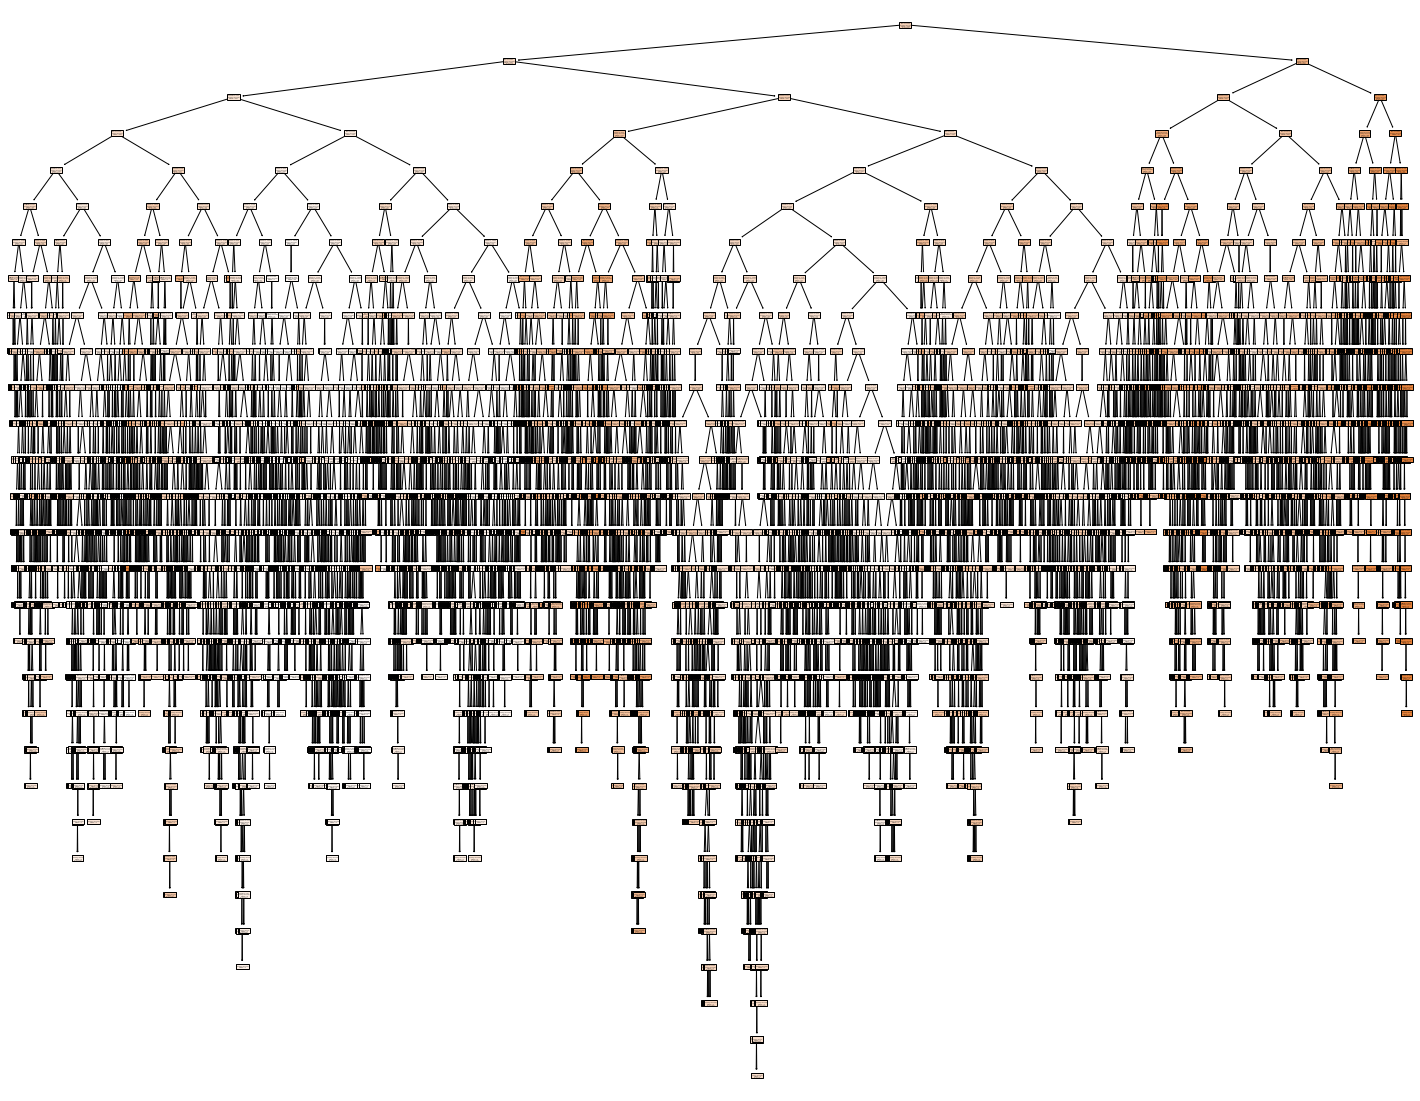

In [13]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtr, feature_names=california_housing.feature_names, filled=True)

При сравнении моделей очевидно, что регрессионное дерево дает более высокую точность предсказаний, если не ограничивать глубину дерева. Но визуализировать граф при этом уже не удается .

In [17]:
list_depth = [1,2,3,4,5,7]
dt_regs = {}
for i in list_depth:
    dt_regs[f'depth={i}'] = DecisionTreeRegressor(max_depth=i).fit(X, y)
dt_regs['depth=inf'] = DecisionTreeRegressor().fit(X, y)
dt_regs['reg'] = DecisionTreeRegressor(min_samples_leaf=3, criterion='absolute_error').fit(X, y)

In [18]:
dt_regs

{'depth=1': DecisionTreeRegressor(max_depth=1),
 'depth=2': DecisionTreeRegressor(max_depth=2),
 'depth=3': DecisionTreeRegressor(max_depth=3),
 'depth=4': DecisionTreeRegressor(max_depth=4),
 'depth=5': DecisionTreeRegressor(max_depth=5),
 'depth=7': DecisionTreeRegressor(max_depth=7),
 'depth=inf': DecisionTreeRegressor(),
 'reg': DecisionTreeRegressor(criterion='absolute_error', min_samples_leaf=3)}

In [19]:
pred_list = {}
for key, cur_dt_reg in dt_regs.items():
      pred_list[key] = cur_dt_reg.predict(X_test)

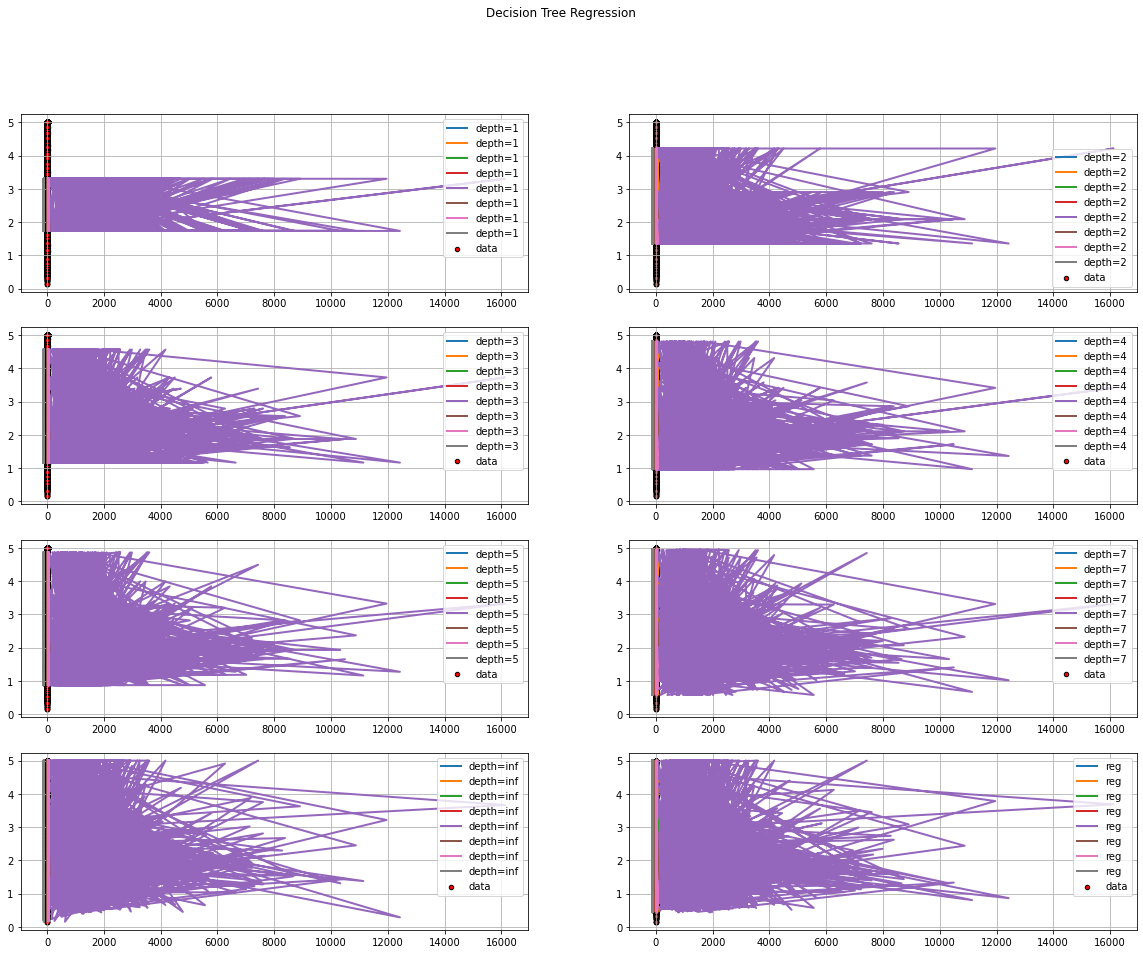

In [22]:
fig, axa = plt.subplots(4,2, figsize=(20,15))
for i, (key , cur_pred) in enumerate(pred_list.items()):
    ax = axa[i//2,i%2]
    ax.scatter(X['MedInc'], y, s=20, edgecolor="black",c="red", label="data")
    ax.plot(X_test, cur_pred,label=f"{key}", linewidth=2)
    ax.grid()
    ax.legend()

fig.suptitle("Decision Tree Regression")
plt.show()